In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

In [148]:
df = pd.read_csv('hour.csv')

## Question 1

### Answer variable distribution

<Axes: xlabel='Total rented bikes in a hour', ylabel='Hours'>

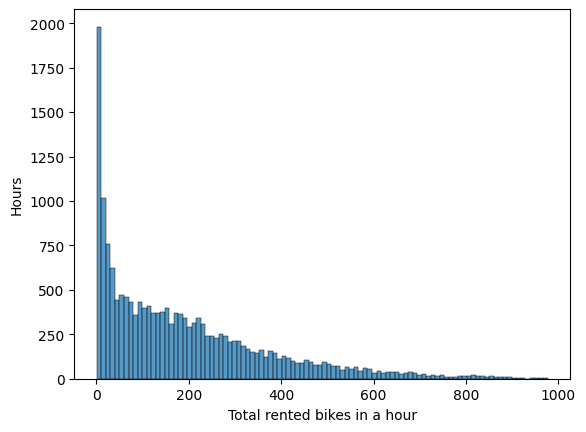

In [149]:
f, axis = plt.subplots()
axis.set_xlabel('Total rented bikes in a hour')
axis.set_ylabel('Hours')
sns.histplot(data=df['cnt'], bins=100, ax=axis)

### Relationship between the day temperature and the answer variable

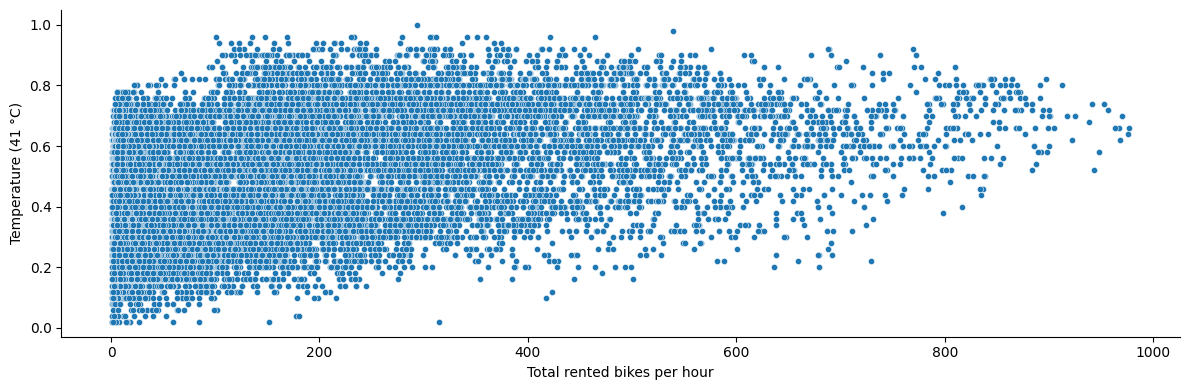

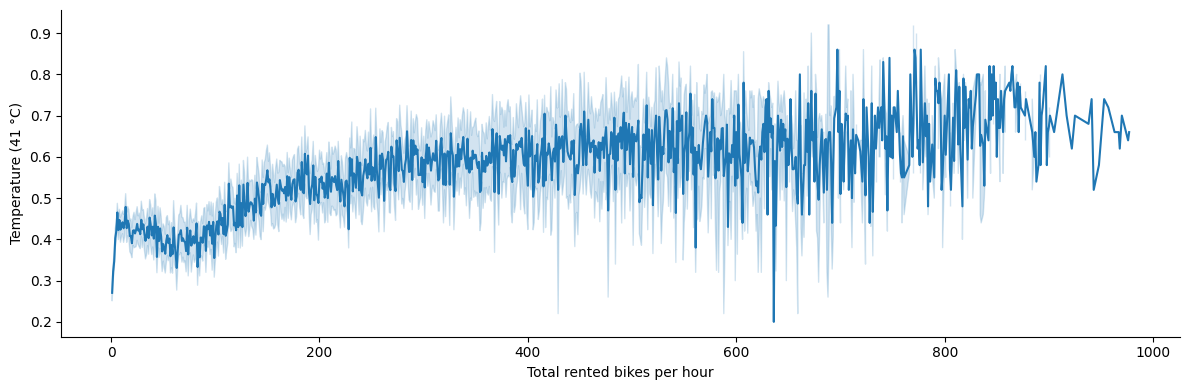

In [150]:
scatter = sns.relplot(data=df, x='cnt', y='temp', s=20, height=4, aspect=3)
scatter.set(xlabel = 'Total rented bikes per hour', ylabel='Temperature (41 °C)')
line = sns.relplot(data=df, x='cnt', y='temp', kind="line", height=4, aspect=3)
line.set(xlabel = 'Total rented bikes per hour', ylabel='Temperature (41 °C)')

## Question 2

- **Explanatory variables**: season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed

- **Future variables**: casual, registered

- **Answer variable**: cnt

- **Metadata variables**: instant, dteday


In [151]:
answer_variable = ['cnt']
future_variables = ['casual', 'registered']
metadata_variables = ['instant', 'dteday']

We'll get a data frame without the variables that won't be used in the following questions, i.e. future and metadata variables.

In [152]:
def remove_variables(df, variables):
    new_df = df
    for v in variables:
        new_df = new_df.drop(v, axis=1)
    return new_df

In [153]:
df_Xy = remove_variables(df, future_variables + metadata_variables)

## Question 3

We're going to transform the qualitative variables in dummies and construct a new data frame with those. After, this data frame will be divided in train and test data.

- **Qualitative variables**: season, mnth, hr, weekday e weathersit

In [154]:
qualitative_variables = ['season', 'mnth', 'hr', 'weekday', 'weathersit']

In [155]:
def qualitative_to_dummie(df, variable):
    # Get the sparce matrix of the qualitative variable with OneHotEncoder
    ohe = OneHotEncoder(handle_unknown='ignore')
    sparce_matrix = ohe.fit_transform(df[variable].to_numpy().reshape(-1, 1)).toarray()

    # Get the names for each column of the sparce matrix
    column_names = []
    for i in range(len(sparce_matrix[0])):
        column_names.append(variable + str(i))

    # Get a data frame from the sparce matrix
    df_matrix = pd.DataFrame(data=sparce_matrix, columns=column_names) 

    # Substitute the qualitative variable with new binary ones representing each state of the original
    df_new = pd.concat([df, df_matrix], axis=1)
    df_new.drop(variable, axis=1, inplace=True) 

    return df_new

In [156]:
for v in qualitative_variables:
    df_Xy = qualitative_to_dummie(df_Xy, v)

df_Xy.head(2)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season0,season1,...,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weathersit0,weathersit1,weathersit2,weathersit3
0,0,0,0,0.24,0.2879,0.81,0.0,16,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,0,0,0.22,0.2727,0.80,0.0,40,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [157]:
df_train = df_Xy[df_Xy['yr'] == 0].drop('yr', axis=1)
df_train.head(2)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,season0,season1,season2,...,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weathersit0,weathersit1,weathersit2,weathersit3
0,0,0,0.24,0.2879,0.81,0.0,16,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,0,0.22,0.2727,0.80,0.0,40,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [158]:
df_test = df_Xy[df_Xy['yr'] == 1].drop('yr', axis=1)
df_test.head(2)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season0,season1,season2,...,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weathersit0,weathersit1,weathersit2,weathersit3
8645,0,0,0.36,0.3788,0.66,0.0000,48,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8646,0,0,0.36,0.3485,0.66,0.1343,93,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Questão 4

In [159]:
# Get a data frame with the explanatory variables and a array with the answer variable

X_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt'].to_numpy()

X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt'].to_numpy()

In [ ]:
# Train the classifiers

mlpc1 = MLPClassifier(random_state=42, hidden_layer_sizes=[]).fit(X_train, y_train)
mlpc2 = MLPClassifier(random_state=42, hidden_layer_sizes=[10]).fit(X_train, y_train)
mlpc3 = MLPClassifier(random_state=42, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

In [161]:
# Test the classifiers

mae1 = mean_absolute_error(y_true=y_test, y_pred=mlpc1.predict(X_test))
mae2 = mean_absolute_error(y_true=y_test, y_pred=mlpc2.predict(X_test))
mae3 = mean_absolute_error(y_true=y_test, y_pred=mlpc3.predict(X_test))

In [162]:
print("Mean absolute error")
print(f"- with no intermidiate layers: {mae1}")
print(f"- with 1 intermidiate layer: {mae2}")
print(f"- with 2 intermidiate layers: {mae3}")

Mean absolute error
- with no intermidiate layers: 99.91905198076482
- with 1 intermidiate layer: 97.72166246851386
- with 2 intermidiate layers: 91.16063659262652
